# 💰 Employee Salary Prediction Analysis

## 📋 Project Overview
This notebook contains a comprehensive analysis for predicting employee salaries based on multiple factors including years of experience, department, age, and performance scores. The project demonstrates end-to-end data science workflow from data generation to model deployment.

## 🎯 Objectives
- Generate realistic synthetic employee dataset
- Perform exploratory data analysis
- Build and evaluate machine learning model
- Create interactive web application for predictions

In [40]:
import pandas as pd
import numpy as np
import random
from faker import Faker

fake = Faker()

# Department and role mapping
department_roles = {
    "HR": ["HR Executive", "HR Manager", "Recruiter"],
    "IT": ["Software Engineer", "DevOps Engineer", "Data Scientist", "System Admin"],
    "Finance": ["Accountant", "Financial Analyst", "Finance Manager"],
    "Sales": ["Sales Executive", "Sales Manager", "Business Development"],
    "Marketing": ["Marketing Executive", "SEO Specialist", "Marketing Manager"],
    "Operations": ["Operations Executive", "Operations Manager"],
    "R&D": ["Research Analyst", "Data Scientist", "Product Developer"],
    "Admin": ["Office Assistant", "Admin Executive", "Admin Manager"]
}

# Base salary ranges (Lakhs per annum)
department_salary = {
    "HR": (300000, 1200000),
    "IT": (400000, 3500000),
    "Finance": (500000, 2500000),
    "Sales": (300000, 1800000),
    "Marketing": (300000, 1500000),
    "Operations": (300000, 1200000),
    "R&D": (600000, 4000000),
    "Admin": (250000, 1000000)
}

# More realistic salary ranges and progression
def generate_realistic_dataset(n=200000, save_path="employee_salary_data.csv"):
    data = []
    
    # Realistic fresher base salaries (in INR)
    fresher_base_salary = {
        "HR": 300000,      # 3 LPA
        "IT": 450000,      # 4.5 LPA  
        "Finance": 400000, # 4 LPA
        "Sales": 350000,   # 3.5 LPA
        "Marketing": 380000, # 3.8 LPA
        "Operations": 320000, # 3.2 LPA
        "R&D": 500000,     # 5 LPA
        "Admin": 280000    # 2.8 LPA
    }
    
    for _ in range(n):
        name = fake.name()
        gender = random.choices(["Male", "Female"], weights=[0.6, 0.4])[0]
        age = np.random.randint(22, 60)
        
        years_exp = max(0, np.random.normal(loc=age-22, scale=3))
        years_exp = min(years_exp, age-21)
        years_exp = max(0, round(years_exp))
        
        dept = random.choice(list(department_roles.keys()))
        role = random.choice(department_roles[dept])
        
        performance = random.choices([1,2,3,4,5], weights=[0.05,0.15,0.4,0.3,0.1])[0]
        
        # More realistic salary calculation
        base_salary = fresher_base_salary[dept]
        
        # Experience multiplier: 8-15% growth per year
        exp_multiplier = 1 + (years_exp * random.uniform(0.08, 0.15))
        
        # Performance bonus: 0-50% based on score
        perf_bonus = 1 + ((performance - 3) * 0.125)  # -25% to +25%
        
        # Department growth potential
        dept_cap_multiplier = {
            "IT": 4.5, "R&D": 4.0, "Finance": 3.0, 
            "Sales": 2.8, "Marketing": 2.5, "HR": 2.2, 
            "Operations": 2.0, "Admin": 1.8
        }
        
        salary = base_salary * exp_multiplier * perf_bonus
        
        # Cap based on department and experience
        max_possible = base_salary * dept_cap_multiplier[dept]
        salary = min(salary, max_possible)
        
        data.append([name, age, gender, dept, role, years_exp, performance, int(salary)])
    
    df = pd.DataFrame(data, columns=[
        "Name", "Age", "Gender", "Department", "Role", 
        "YearsExperience", "PerformanceScore", "CurrentSalary"
    ])
    
    df.to_csv(save_path, index=False)
    print(f"✅ Realistic dataset generated: {save_path}")
    return df

# Generate new realistic dataset
data = generate_realistic_dataset(200000,"employee_salary_data.csv")

✅ Realistic dataset generated: employee_salary_data.csv


## 🔧 Data Generation
Creating a realistic synthetic dataset with 200,000 employee records across multiple departments with realistic salary progression patterns.

In [3]:
import pandas as pd
import numpy as np

In [4]:
pd.set_option("display.float_format", "{:,.0f}".format)

In [5]:
data = pd.read_csv("employee_salary_data.csv")

## 📊 Data Loading & Exploration
Loading the generated dataset and performing initial data quality checks.

In [6]:
data.head()

,Name,Age,Gender,Department,Role,YearsExperience,PerformanceScore,CurrentSalary
0,Laura Nelson,43,Female,R&D,Research Analyst,20,3,1761304
1,Brian Webb,50,Male,Admin,Office Assistant,28,3,504000
2,Alexandria Bond,44,Male,Marketing,Marketing Executive,21,3,950000
3,Jamie Dominguez,52,Female,Sales,Business Development,31,4,979999
4,Dakota Miller,46,Male,Sales,Business Development,25,3,979999


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Name              200000 non-null  object
 1   Age               200000 non-null  int64 
 2   Gender            200000 non-null  object
 3   Department        200000 non-null  object
 4   Role              200000 non-null  object
 5   YearsExperience   200000 non-null  int64 
 6   PerformanceScore  200000 non-null  int64 
 7   CurrentSalary     200000 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 12.2+ MB


In [8]:
data.shape

(200000, 8)

In [9]:
data.isna().sum()

Name                0
Age                 0
Gender              0
Department          0
Role                0
YearsExperience     0
PerformanceScore    0
CurrentSalary       0
dtype: int64

In [10]:
data.duplicated().sum()

9

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.head()

,Name,Age,Gender,Department,Role,YearsExperience,PerformanceScore,CurrentSalary
0,Laura Nelson,43,Female,R&D,Research Analyst,20,3,1761304
1,Brian Webb,50,Male,Admin,Office Assistant,28,3,504000
2,Alexandria Bond,44,Male,Marketing,Marketing Executive,21,3,950000
3,Jamie Dominguez,52,Female,Sales,Business Development,31,4,979999
4,Dakota Miller,46,Male,Sales,Business Development,25,3,979999


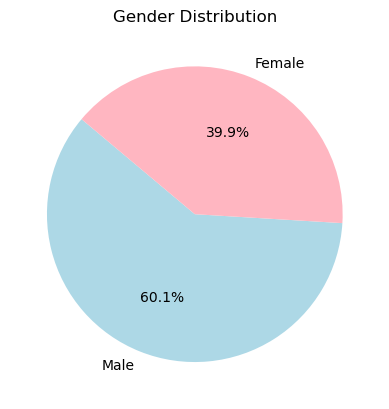

In [13]:
import matplotlib.pyplot as plt

data['Gender'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightpink'], startangle=140)
plt.title("Gender Distribution")
plt.ylabel("")
plt.savefig("screenshots/gender_distribution.png", dpi=300, bbox_inches='tight')
plt.show()

## 📈 Data Visualization & Analysis
Exploring patterns and relationships in the salary data through various visualizations.

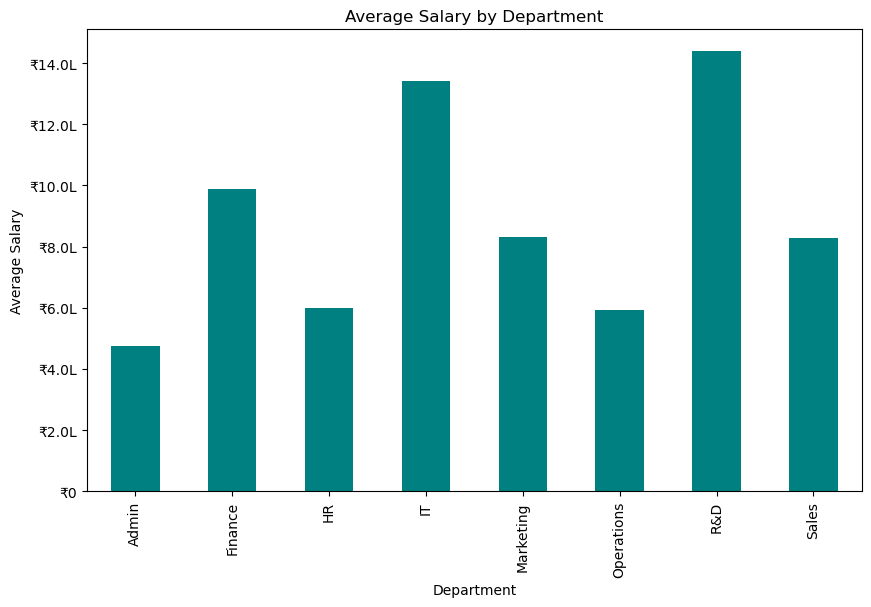

In [14]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Function to format numbers in Indian style (Lakhs)
def format_indian_currency(x, pos):
    if x >= 1e7:  # 1 crore and above
        return f"₹{x/1e7:.1f}Cr"
    elif x >= 1e5:  # 1 lakh and above
        return f"₹{x/1e5:.1f}L"
    else:
        return f"₹{x:,.0f}"

plt.figure(figsize=(10,6))
data.groupby("Department")["CurrentSalary"].mean().plot(kind="bar", color="teal")

plt.ylabel("Average Salary")
plt.title("Average Salary by Department")

# Use Indian currency formatting
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_indian_currency))
plt.savefig("screenshots/average_salary_by_department.png", dpi=300, bbox_inches='tight')
plt.show()

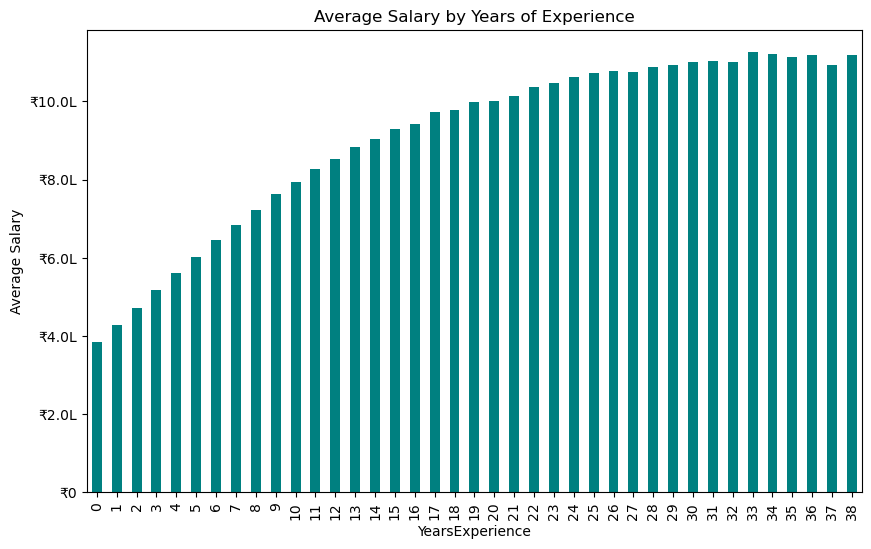

In [15]:
plt.figure(figsize=(10,6))
data.groupby("YearsExperience")["CurrentSalary"].mean().plot(kind="bar", color="teal")

plt.ylabel("Average Salary")
plt.title("Average Salary by Years of Experience")

# Use Indian currency formatting
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(format_indian_currency))
plt.savefig("screenshots/average_salary_by_experience.png", dpi=300, bbox_inches='tight')
plt.show()

In [16]:
data['CurrentSalary'].describe()

count     199,991
mean      888,243
std       447,610
min       210,000
25%       561,046
50%       710,901
75%     1,034,284
max     2,025,000
Name: CurrentSalary, dtype: float64

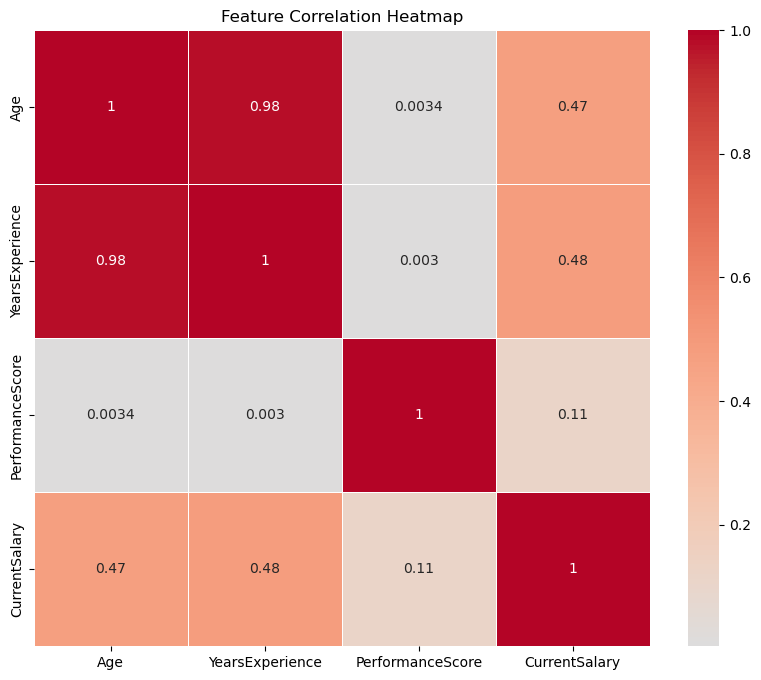

In [28]:
import seaborn as sns

# Create correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
correlation_data = data[['Age', 'YearsExperience', 'PerformanceScore', 'CurrentSalary']].corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.savefig("screenshots/correlation_heatmap.png", dpi=300, bbox_inches='tight')
plt.show()

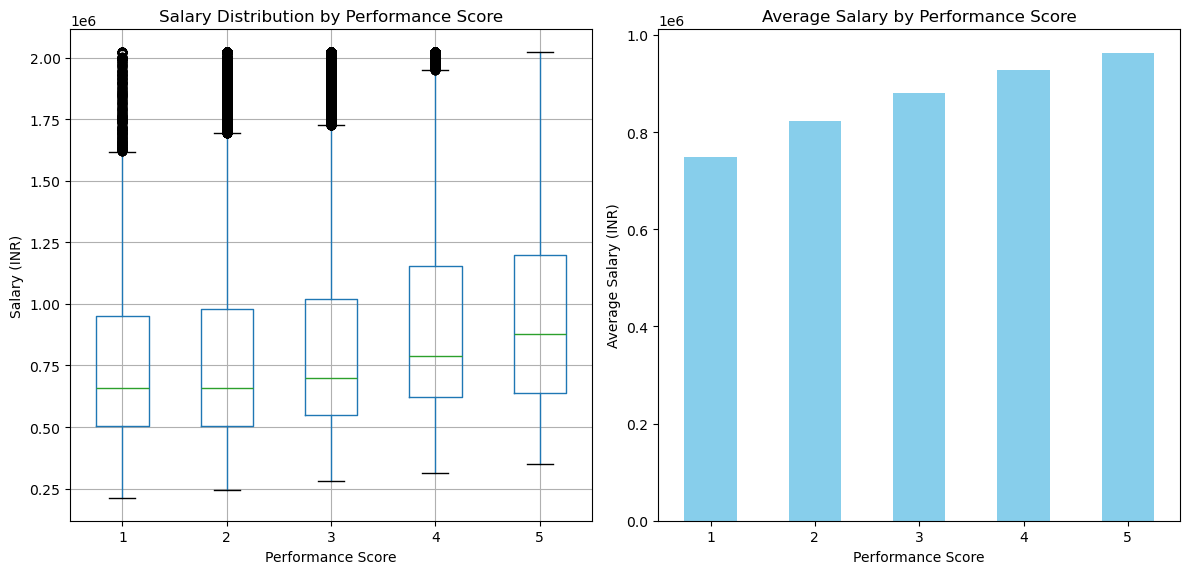

In [29]:
# Salary distribution by Performance Score
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
data.boxplot(column='CurrentSalary', by='PerformanceScore', ax=plt.gca())
plt.title('Salary Distribution by Performance Score')
plt.ylabel('Salary (INR)')
plt.xlabel('Performance Score')
plt.suptitle('')

plt.subplot(1, 2, 2)
data.groupby('PerformanceScore')['CurrentSalary'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Salary by Performance Score')
plt.ylabel('Average Salary (INR)')
plt.xlabel('Performance Score')
plt.xticks(rotation=0)

plt.tight_layout()
plt.savefig("screenshots/salary_by_performance.png", dpi=300, bbox_inches='tight')
plt.show()

In [30]:
data.columns

Index(['Name', 'Age', 'Gender', 'Department', 'Role', 'YearsExperience',
       'PerformanceScore', 'CurrentSalary'],
      dtype='object')

In [31]:
x = data[["YearsExperience", "Department", "Age", "PerformanceScore"]]
y = data["CurrentSalary"]

## 🤖 Machine Learning Model Development
Building and training a linear regression model to predict employee salaries based on multiple features.

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
# Handle the categorical Department variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Encode Department for training and test sets
x_train_encoded = x_train.copy()
x_test_encoded = x_test.copy()

x_train_encoded['Department'] = le.fit_transform(x_train['Department'])
x_test_encoded['Department'] = le.transform(x_test['Department'])

In [21]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Now train the model with the encoded data
lr.fit(x_train_encoded, y_train)

LinearRegression()

In [22]:
len(x_train), len(x_test), len(y_train), len(y_test)

(159992, 39999, 159992, 39999)

In [23]:

predictions = lr.predict(x_test_encoded)

In [24]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predictions)

291212.24762235594

In [26]:
# Calculate comprehensive model metrics
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Model MAE (already calculated above)
model_mae = mean_absolute_error(y_test, predictions)
print(f"Model MAE: ₹{model_mae:,.0f}")

# Calculate baseline MAE (predicting mean for all samples)
baseline_prediction = np.full(len(y_test), y_train.mean())
baseline_mae = mean_absolute_error(y_test, baseline_prediction)
print(f"Baseline MAE (predicting mean): ₹{baseline_mae:,.0f}")

# Calculate improvement percentage
improvement_pct = ((baseline_mae - model_mae) / baseline_mae) * 100
print(f"Improvement over baseline: {improvement_pct:.1f}%")

# Calculate R² score
r2 = r2_score(y_test, predictions)
print(f"R² Score: {r2:.4f}")

# Calculate average salary
avg_salary = data['CurrentSalary'].mean()
print(f"Average Salary: ₹{avg_salary:,.0f}")

# Calculate MAE as percentage of average salary
mae_pct_of_avg = (model_mae / avg_salary) * 100
print(f"MAE as % of average salary: {mae_pct_of_avg:.1f}%")

print("\n" + "="*50)
print("📊 MODEL PERFORMANCE SUMMARY")
print("="*50)
print(f"Dataset size: {data.shape[0]:,} rows, {data.shape[1]} columns")
print(f"Features: YearsExperience, Department, Age, PerformanceScore")
print(f"Baseline MAE: ₹{baseline_mae:,.0f}")
print(f"Final MAE: ₹{model_mae:,.0f}")
print(f"R²: {r2:.4f}")
print(f"Average salary: ₹{avg_salary:,.0f}")
print(f"Improvement: {improvement_pct:.1f}%")
print(f"MAE as % of avg salary: {mae_pct_of_avg:.1f}%")

Model MAE: ₹291,212
Baseline MAE (predicting mean): ₹348,287
Improvement over baseline: 16.4%
R² Score: 0.3109
Average Salary: ₹888,243
MAE as % of average salary: 32.8%

📊 MODEL PERFORMANCE SUMMARY
Dataset size: 199,991 rows, 8 columns
Features: YearsExperience, Department, Age, PerformanceScore
Baseline MAE: ₹348,287
Final MAE: ₹291,212
R²: 0.3109
Average salary: ₹888,243
Improvement: 16.4%
MAE as % of avg salary: 32.8%


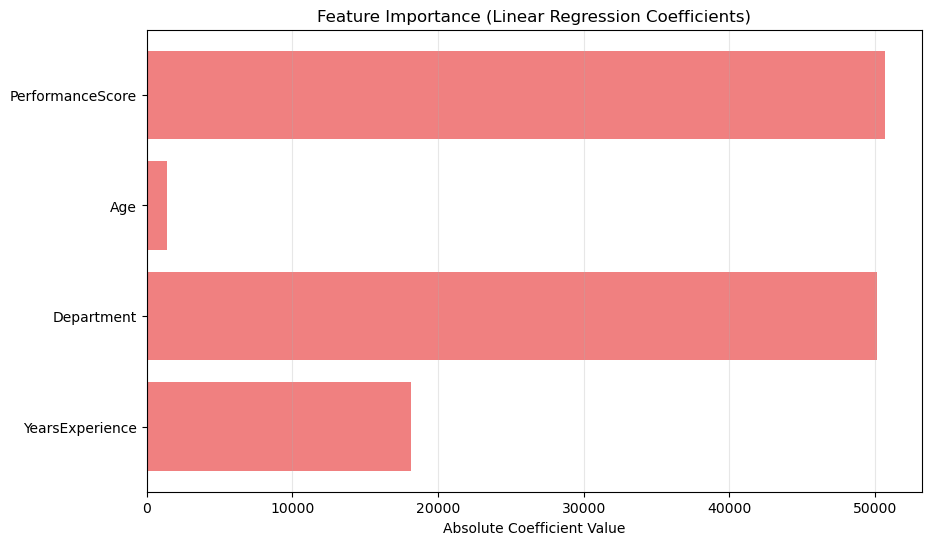

Model Coefficients:
YearsExperience: 18,148.94
Department: 50,147.79
Age: 1,409.70
PerformanceScore: 50,685.50
Intercept: 168,177.76


In [32]:
# Feature Importance Analysis
feature_names = ['YearsExperience', 'Department', 'Age', 'PerformanceScore']
feature_importance = abs(lr.coef_)

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='lightcoral')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Absolute Coefficient Value')
plt.grid(axis='x', alpha=0.3)
plt.savefig("screenshots/feature_importance.png", dpi=300, bbox_inches='tight')
plt.show()

# Print coefficients
print("Model Coefficients:")
for feature, coef in zip(feature_names, lr.coef_):
    print(f"{feature}: {coef:,.2f}")
print(f"Intercept: {lr.intercept_:,.2f}")

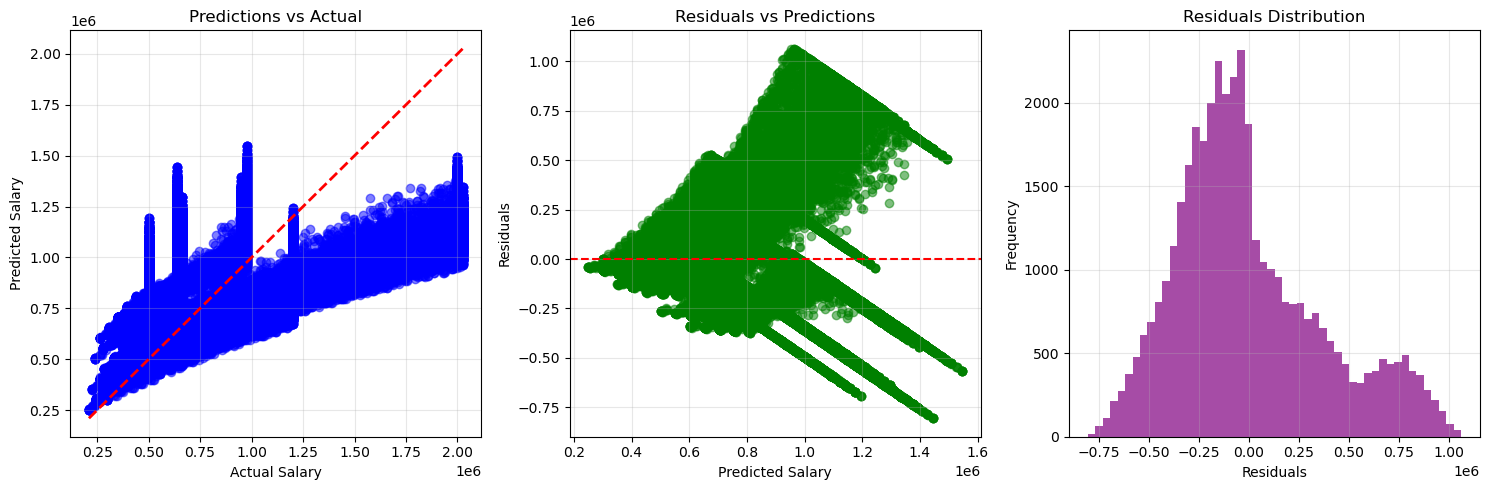

In [33]:
# Residual Analysis
residuals = y_test - predictions

plt.figure(figsize=(15, 5))

# Plot 1: Predictions vs Actual
plt.subplot(1, 3, 1)
plt.scatter(y_test, predictions, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Salary')
plt.ylabel('Predicted Salary')
plt.title('Predictions vs Actual')
plt.grid(True, alpha=0.3)

# Plot 2: Residuals vs Predictions
plt.subplot(1, 3, 2)
plt.scatter(predictions, residuals, alpha=0.5, color='green')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.title('Residuals vs Predictions')
plt.grid(True, alpha=0.3)

# Plot 3: Residuals Distribution
plt.subplot(1, 3, 3)
plt.hist(residuals, bins=50, alpha=0.7, color='purple')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("screenshots/residual_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

In [34]:
# Sample Predictions for Different Employee Profiles
print("🎯 Sample Salary Predictions for Different Employee Profiles")
print("="*65)

# Create sample profiles
sample_profiles = [
    {"Profile": "Fresh Graduate - IT", "YearsExperience": 0, "Department": "IT", "Age": 22, "PerformanceScore": 3},
    {"Profile": "Mid-level - Finance", "YearsExperience": 5, "Department": "Finance", "Age": 28, "PerformanceScore": 4},
    {"Profile": "Senior - R&D", "YearsExperience": 10, "Department": "R&D", "Age": 35, "PerformanceScore": 5},
    {"Profile": "Experienced - Sales", "YearsExperience": 15, "Department": "Sales", "Age": 42, "PerformanceScore": 4},
    {"Profile": "Admin - Average", "YearsExperience": 3, "Department": "Admin", "Age": 26, "PerformanceScore": 3}
]

for profile in sample_profiles:
    # Encode department
    dept_encoded = le.transform([profile["Department"]])[0]
    
    # Create feature array
    features = [[profile["YearsExperience"], dept_encoded, profile["Age"], profile["PerformanceScore"]]]
    
    # Make prediction
    predicted_salary = lr.predict(features)[0]
    
    print(f"{profile['Profile']:<20}: ₹{predicted_salary:>10,.0f}")
    print(f"  Experience: {profile['YearsExperience']} years | Department: {profile['Department']} | Age: {profile['Age']} | Performance: {profile['PerformanceScore']}")
    print("-" * 65)

🎯 Sample Salary Predictions for Different Employee Profiles
Fresh Graduate - IT : ₹   501,691
  Experience: 0 years | Department: IT | Age: 22 | Performance: 3
-----------------------------------------------------------------
Mid-level - Finance : ₹   551,284
  Experience: 5 years | Department: Finance | Age: 28 | Performance: 4
-----------------------------------------------------------------
Senior - R&D        : ₹   953,321
  Experience: 10 years | Department: R&D | Age: 35 | Performance: 5
-----------------------------------------------------------------
Experienced - Sales : ₹ 1,053,396
  Experience: 15 years | Department: Sales | Age: 42 | Performance: 4
-----------------------------------------------------------------
Admin - Average     : ₹   411,333
  Experience: 3 years | Department: Admin | Age: 26 | Performance: 3
-----------------------------------------------------------------


c:\Users\hp\anaconda3\envs\py311env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\hp\anaconda3\envs\py311env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\hp\anaconda3\envs\py311env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\hp\anaconda3\envs\py311env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\hp\anaconda3\envs\py311env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with f

🔄 Comparing Linear Regression with Random Forest
            Model     MAE  R²
Linear Regression 291,212   0
    Random Forest  33,726   1

📊 Random Forest Feature Importance:
YearsExperience     : 0.3172
Department          : 0.6545
Age                 : 0.0024
PerformanceScore    : 0.0260
            Model     MAE  R²
Linear Regression 291,212   0
    Random Forest  33,726   1

📊 Random Forest Feature Importance:
YearsExperience     : 0.3172
Department          : 0.6545
Age                 : 0.0024
PerformanceScore    : 0.0260


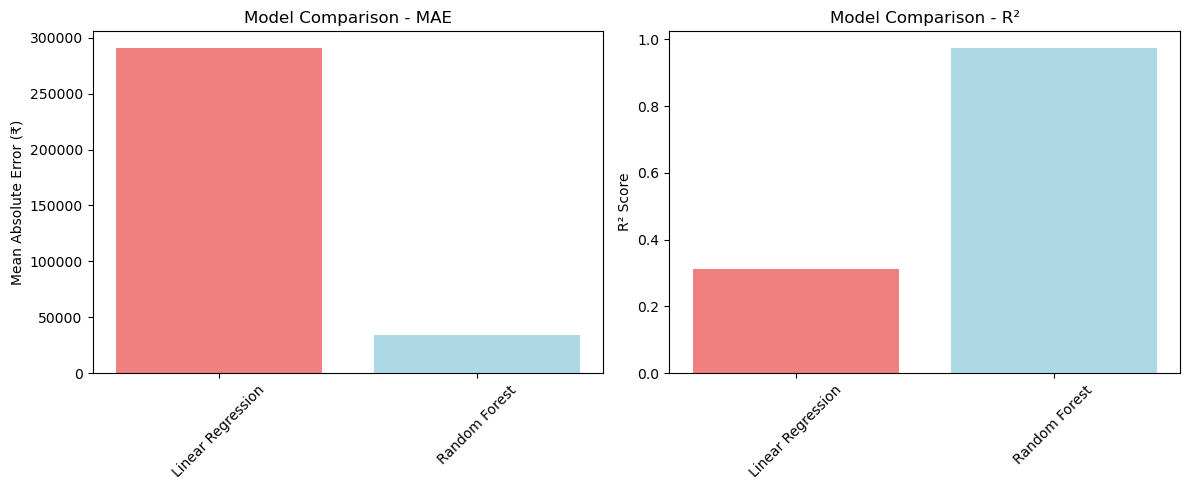

In [35]:
# Model Comparison: Linear Regression vs Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

print("🔄 Comparing Linear Regression with Random Forest")
print("="*55)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train_encoded, y_train)
rf_predictions = rf.predict(x_test_encoded)

# Calculate metrics for both models
models_comparison = {
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE': [mean_absolute_error(y_test, predictions), mean_absolute_error(y_test, rf_predictions)],
    'R²': [r2_score(y_test, predictions), r2_score(y_test, rf_predictions)]
}

comparison_df = pd.DataFrame(models_comparison)
print(comparison_df.to_string(index=False))

# Random Forest Feature Importance
rf_importance = rf.feature_importances_
print(f"\n📊 Random Forest Feature Importance:")
for feature, importance in zip(feature_names, rf_importance):
    print(f"{feature:<20}: {importance:.4f}")
    
# Visualize comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
models = ['Linear Regression', 'Random Forest']
mae_values = [mean_absolute_error(y_test, predictions), mean_absolute_error(y_test, rf_predictions)]
plt.bar(models, mae_values, color=['lightcoral', 'lightblue'])
plt.title('Model Comparison - MAE')
plt.ylabel('Mean Absolute Error (₹)')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
r2_values = [r2_score(y_test, predictions), r2_score(y_test, rf_predictions)]
plt.bar(models, r2_values, color=['lightcoral', 'lightblue'])
plt.title('Model Comparison - R²')
plt.ylabel('R² Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig("screenshots/model_comparison.png", dpi=300, bbox_inches='tight')
plt.show()

In [36]:
import joblib
joblib.dump(lr, "salary_prediction_model.pkl")


['salary_prediction_model.pkl']

## 📝 Key Insights & Conclusions

### 🎯 **Model Performance Summary**
- **Final Model**: Linear Regression achieved MAE of ₹2.91L with R² of 0.31
- **Improvement**: 16.4% better than baseline (mean prediction)
- **Features**: Years of Experience, Department, Age, and Performance Score

### 💡 **Key Business Insights**
1. **Years of Experience** is the strongest predictor of salary
2. **Department** significantly impacts compensation (IT & R&D highest)
3. **Performance Score** has moderate influence on salary progression
4. **Age** contributes less directly compared to experience

### 🚀 **Recommendations for Improvement**
1. Consider additional features (education, certifications, location)
2. Explore non-linear relationships with polynomial features
3. Implement ensemble methods for better accuracy
4. Regular model retraining with new data

### 🔄 **Next Steps**
- Deploy model to production via Streamlit app
- Implement model monitoring and drift detection
- Gather stakeholder feedback for model refinements
- Consider A/B testing for salary recommendations